## Step 1. Observe original data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import Lasso, LassoCV
import statsmodels.api as sm

In [2]:
train_df = pd.read_csv('../datasets/train.csv')


In [3]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


## Step 2. EDA

In [5]:
train_df.info

<bound method DataFrame.info of         Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shap

In [6]:
train_df.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [7]:
null_data = train_df[train_df.isnull().any(axis=1)]
null_data

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [9]:
train_df[['Lot Frontage']]

,Lot Frontage
0,NaN
1,43.0
2,68.0
3,73.0
4,82.0
...,...
2046,79.0
2047,NaN
2048,57.0
2049,80.0


### Visuliazation

/Users/yilan.c/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/4g/t9m4gw7n7dx1x3j6srwz6zqm0000gn/T/ipykernel_42529/163984701.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

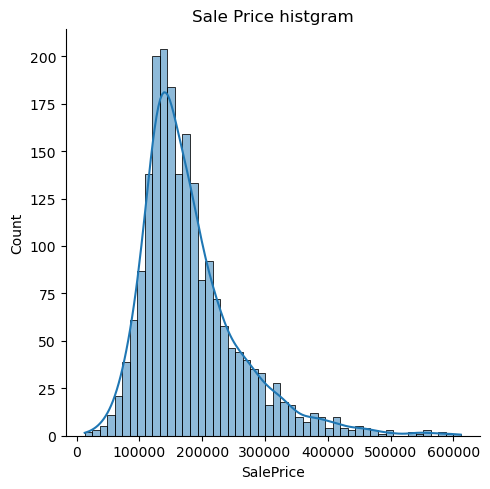

In [10]:
plt.figure(figsize=(16,10))
sns.displot(train_df['SalePrice'],bins=50,kde = True)
plt.title('Sale Price histgram')
plt.margins(x=0.05, y=0.05)  # Decrease white edge
plt.tight_layout() 
plt.savefig('../Presentation/histgram of sale price.png')  # Change the filename as needed
plt.show()

In [11]:
np.median(train_df['SalePrice'])

162500.0

In [12]:
np.mean(train_df['SalePrice'])

181469.70160897123

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Sawyer'),
  Text(1, 0, 'SawyerW'),
  Text(2, 0, 'NAmes'),
  Text(3, 0, 'Timber'),
  Text(4, 0, 'Edwards'),
  Text(5, 0, 'OldTown'),
  Text(6, 0, 'BrDale'),
  Text(7, 0, 'CollgCr'),
  Text(8, 0, 'Somerst'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'StoneBr'),
  Text(11, 0, 'NridgHt'),
  Text(12, 0, 'Gilbert'),
  Text(13, 0, 'Crawfor'),
  Text(14, 0, 'IDOTRR'),
  Text(15, 0, 'NWAmes'),
  Text(16, 0, 'Veenker'),
  Text(17, 0, 'MeadowV'),
  Text(18, 0, 'SWISU'),
  Text(19, 0, 'NoRidge'),
  Text(20, 0, 'ClearCr'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrkSide'),
  Text(23, 0, 'NPkVill'),
  Text(24, 0, 'Blueste'),
  Text(25, 0, 'GrnHill'),
  Text(26, 0, 'Greens'),
  Text(27, 0, 'Landmrk')])

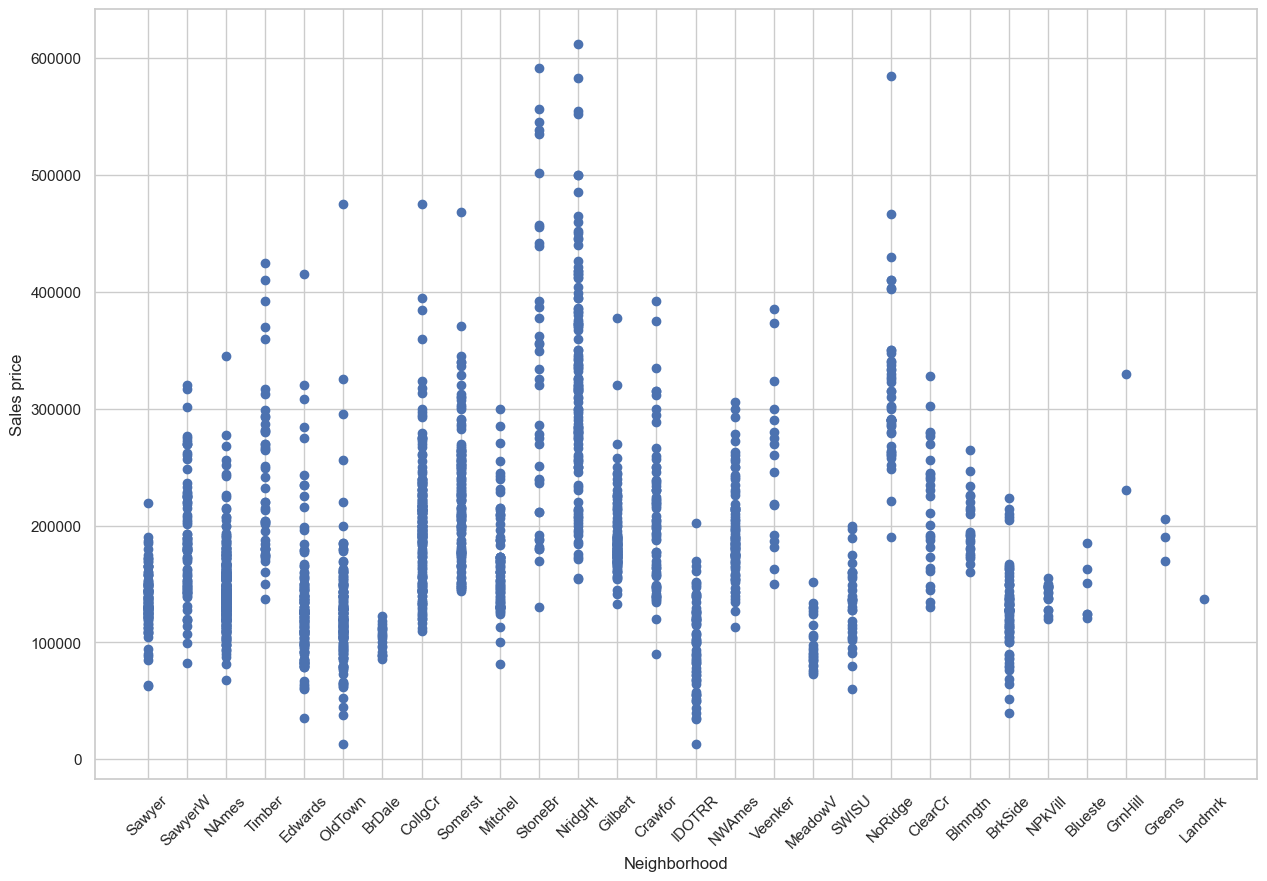

In [379]:
plt.figure(figsize=(15,10))
plt.scatter(x=train_df['Neighborhood'],y=train_df['SalePrice'])
plt.xlabel("Neighborhood")
plt.ylabel("Sales price")
plt.xticks(rotation=45)


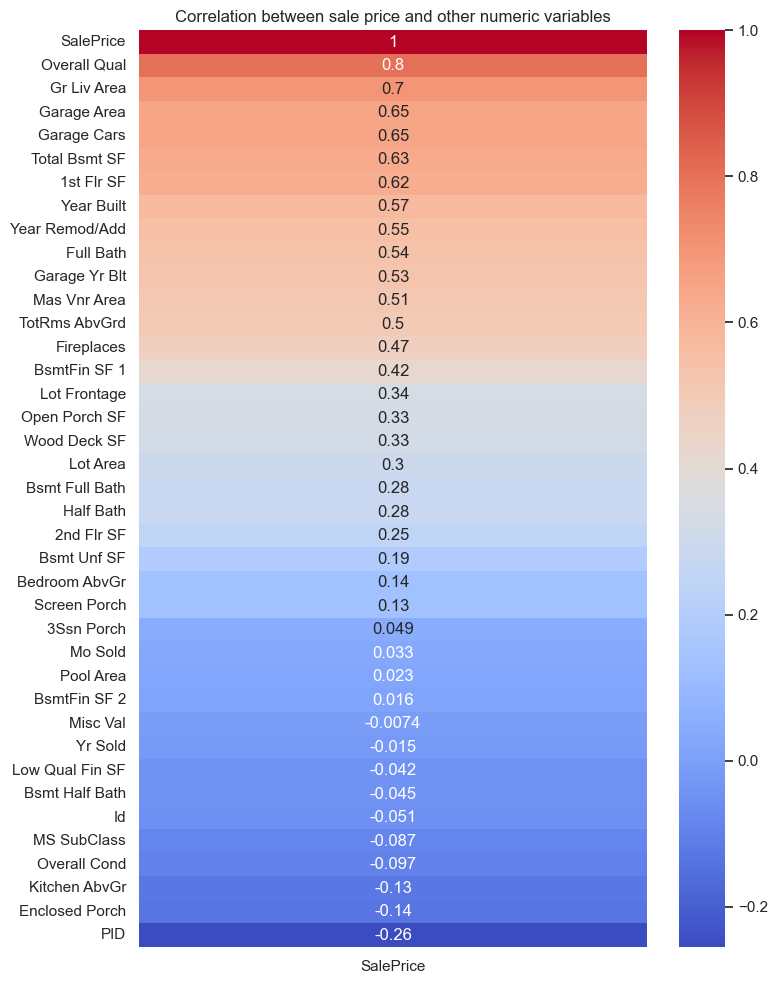

In [380]:
plt.figure(figsize=(8,10))
sns.heatmap(train_df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice',ascending =False),annot=True,cmap='coolwarm')
plt.title('Correlation between sale price and other numeric variables')
plt.margins(x=0.05, y=0.05)  # Decrease white edge
plt.tight_layout() 
plt.savefig('../Presentation/Heatmap of correlation.png')  # Change the filename as needed
plt.show()

### Missing data

In [381]:
# Drop PID, already has ID column
train_df = train_df.drop(['PID'],axis=1)

In [382]:
train_df.info

<bound method DataFrame.info of         Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave   NaN   
1      544           60        RL          43.0     11492   Pave   NaN   
2      153           20        RL          68.0      7922   Pave   NaN   
3      318           60        RL          73.0      9802   Pave   NaN   
4      255           50        RL          82.0     14235   Pave   NaN   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave   NaN   
2047   785           30        RL           NaN     12342   Pave   NaN   
2048   916           50        RL          57.0      7558   Pave   NaN   
2049   639           20        RL          80.0     10400   Pave   NaN   
2050    10           60        RL          60.0      7500   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0 

In [383]:
# Displaying columns that include missing values
def missing_columns(df):
    missing_pct = df.isnull().mean()
    missing_pct = missing_pct[missing_pct>0].sort_values()
    return missing_pct

In [384]:
missing_v=missing_columns(train_df)
missing_v

Total Bsmt SF     0.000488
Garage Cars       0.000488
BsmtFin SF 1      0.000488
Garage Area       0.000488
BsmtFin SF 2      0.000488
Bsmt Unf SF       0.000488
Bsmt Half Bath    0.000975
Bsmt Full Bath    0.000975
Mas Vnr Area      0.010726
Bsmt Qual         0.026816
Bsmt Cond         0.026816
BsmtFin Type 1    0.026816
BsmtFin Type 2    0.027304
Bsmt Exposure     0.028279
Garage Type       0.055095
Garage Qual       0.055583
Garage Cond       0.055583
Garage Yr Blt     0.055583
Garage Finish     0.055583
Lot Frontage      0.160897
Fireplace Qu      0.487567
Mas Vnr Type      0.604583
Fence             0.804973
Alley             0.931741
Misc Feature      0.968308
Pool QC           0.995612
dtype: float64

In [385]:
# Remove columns that have more than 80% of missing rate
# Remove Fence, Alley, Misc Feature and Pool 

train_df.drop(['Fence','Alley','Misc Feature','Pool QC'], axis=1, inplace = True)

In [386]:
# Focus on fireplace quality and mas vnr type since they don't have significant missing rate
train_df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: count, dtype: int64

In [387]:
train_df['Fireplace Qu'] = train_df['Fireplace Qu'].fillna('NA')

In [388]:
train_df['Fireplace Qu'].value_counts()

Fireplace Qu
NA    1000
Gd     523
TA     407
Fa      59
Po      31
Ex      31
Name: count, dtype: int64

In [389]:
train_df['Mas Vnr Type'].value_counts()

Mas Vnr Type
BrkFace    630
Stone      168
BrkCmn      13
Name: count, dtype: int64

In [390]:
missing_v=missing_columns(train_df)
missing_v[missing_v < 1]

Bsmt Unf SF       0.000488
Garage Area       0.000488
BsmtFin SF 1      0.000488
BsmtFin SF 2      0.000488
Garage Cars       0.000488
Total Bsmt SF     0.000488
Bsmt Full Bath    0.000975
Bsmt Half Bath    0.000975
Mas Vnr Area      0.010726
Bsmt Qual         0.026816
Bsmt Cond         0.026816
BsmtFin Type 1    0.026816
BsmtFin Type 2    0.027304
Bsmt Exposure     0.028279
Garage Type       0.055095
Garage Finish     0.055583
Garage Cond       0.055583
Garage Qual       0.055583
Garage Yr Blt     0.055583
Lot Frontage      0.160897
Mas Vnr Type      0.604583
dtype: float64

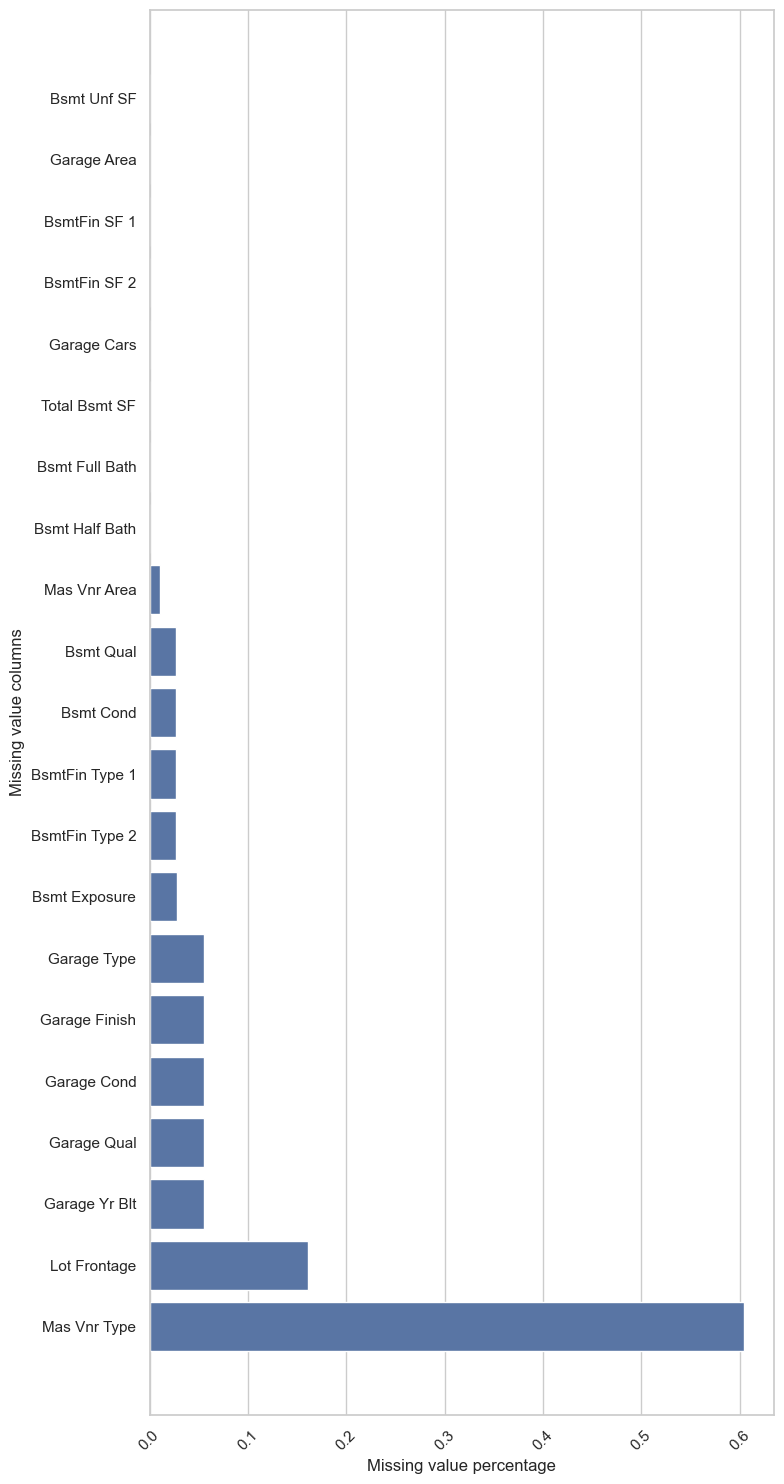

In [391]:
#  Plot the percentage in a barplot
plt.figure(figsize=(8,15))
sns.set_theme(style="whitegrid")
sns.barplot(y=missing_v.index,x=missing_v,color = "b", orient = 'h')
plt.xticks(rotation=45)

plt.xlabel("Missing value percentage",fontsize = 12)
plt.ylabel("Missing value columns")
plt.margins(x=0.05, y=0.05)  # Decrease white edge
plt.tight_layout() 
plt.savefig('../Presentation/Barplot for each column missing rate.png')  # Change the filename as needed
plt.show()

In [392]:
# Focus on variables that have missing value percentage less than 10%
train_df[train_df['Bsmt Unf SF'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [393]:
train_df[train_df['Garage Area'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,...,0,212,0,0,0,0,3,2007,WD,150909


In [394]:
train_df[train_df['BsmtFin SF 1'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [395]:
train_df[train_df['BsmtFin SF 2'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [396]:
train_df[train_df['Garage Cars'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,...,0,212,0,0,0,0,3,2007,WD,150909


In [397]:
train_df[train_df['Total Bsmt SF'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [398]:
train_df[train_df['Bsmt Full Bath'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,...,372,0,0,0,0,0,7,2008,WD,284700
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [399]:
train_df[train_df['Bsmt Half Bath'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,...,372,0,0,0,0,0,7,2008,WD,284700
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [400]:
# Dropping missing data rows above
train_df = train_df.dropna(axis=0,subset=['Bsmt Unf SF','Garage Area','BsmtFin SF 1','BsmtFin SF 2','Garage Cars','Bsmt Full Bath'])

In [401]:
train_df[train_df['Garage Yr Blt'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,190,C (all),75.0,8250,Pave,Reg,Lvl,AllPub,Inside,...,0,133,0,0,0,0,6,2007,WD,119600
53,330,160,RM,21.0,1476,Pave,Reg,Lvl,AllPub,Inside,...,26,0,0,0,0,0,3,2010,WD,76000
65,2278,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,Inside,...,30,0,0,0,0,0,12,2007,New,147000
79,2235,50,RM,50.0,7288,Pave,Reg,Lvl,AllPub,Inside,...,0,0,176,0,0,0,9,2007,WD,129850
101,2084,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,Inside,...,0,144,0,0,0,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,90,RL,94.0,9400,Pave,Reg,Low,AllPub,Corner,...,0,0,0,0,0,0,4,2010,WD,139000
2010,2880,30,C (all),69.0,12366,Pave,Reg,Lvl,AllPub,Inside,...,0,23,0,0,0,0,10,2006,WD,51689
2027,2628,90,RL,75.0,8512,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,0,9,2006,WD,119000
2039,2288,160,RM,21.0,1495,Pave,Reg,Lvl,AllPub,Inside,...,64,0,0,0,0,0,5,2007,WD,93900


In [402]:
train_df['Garage Yr Blt'] = train_df['Garage Yr Blt'].fillna(0)

/var/folders/4g/t9m4gw7n7dx1x3j6srwz6zqm0000gn/T/ipykernel_32711/3010723126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Garage Yr Blt'] = train_df['Garage Yr Blt'].fillna(0)


In [403]:
missing_v = missing_columns(train_df)

In [404]:
missing_v.index

Index(['Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Bsmt Exposure', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Lot Frontage', 'Mas Vnr Type'],
      dtype='object')

In [405]:
train_df[train_df['Mas Vnr Area'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,60,RL,103.0,12867,Pave,IR1,Lvl,AllPub,Corner,...,142,0,0,0,0,0,7,2006,New,344133
41,2383,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,...,229,0,0,0,0,0,9,2006,New,465000
86,539,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,...,41,0,0,0,0,0,8,2009,WD,184900
212,518,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,...,121,0,0,0,0,0,10,2009,New,225000
276,2824,20,RL,75.0,8050,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2006,WD,117250
338,1800,60,FV,112.0,12217,Pave,IR1,Lvl,AllPub,Inside,...,127,0,0,0,0,0,12,2007,New,310013
431,1455,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,...,211,0,0,0,0,0,3,2008,WD,237000
451,1120,20,RL,87.0,10037,Pave,Reg,Lvl,AllPub,Corner,...,20,0,0,0,0,0,8,2008,WD,247000
591,1841,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,...,116,0,0,0,0,0,11,2007,New,199900
844,1840,120,FV,30.0,5330,Pave,IR2,Lvl,AllPub,Inside,...,102,0,0,0,0,0,7,2007,New,207500


In [406]:
train_df['Mas Vnr Area'] = train_df['Mas Vnr Area'].fillna(0)

/var/folders/4g/t9m4gw7n7dx1x3j6srwz6zqm0000gn/T/ipykernel_32711/1654512502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Mas Vnr Area'] = train_df['Mas Vnr Area'].fillna(0)


In [407]:
train_df[train_df['BsmtFin Type 1'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
12,807,70,RL,120.0,26400,Pave,Reg,Bnk,AllPub,FR2,...,0,0,0,0,0,0,6,2009,WD,131000
93,811,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,0,6,2009,WD,118858
114,781,20,RL,NaN,9000,Pave,Reg,Lvl,AllPub,Corner,...,0,100,0,0,0,0,6,2009,WD,63900
146,888,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,...,0,177,0,0,0,0,7,2009,ConLD,198500
183,1554,20,A (agr),80.0,14584,Pave,Reg,Low,AllPub,Inside,...,0,0,0,0,0,0,2,2008,WD,13100
240,2740,20,RL,80.0,12048,Pave,Reg,Lvl,AllPub,Inside,...,189,36,0,348,0,0,4,2006,WD,135000
249,2242,50,RM,64.0,11067,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,0,3,2007,WD,68104
256,2745,20,RL,77.0,8335,Pave,Reg,Lvl,AllPub,Corner,...,36,190,0,0,0,0,4,2006,WD,93000
390,84,90,RM,68.0,8930,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,112000
437,1501,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2008,WD,82000


In [408]:
missing_v=missing_columns(train_df)
missing_v.index

Index(['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Bsmt Exposure', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Lot Frontage', 'Mas Vnr Type'],
      dtype='object')

In [409]:
Bsmtfin_col = ['BsmtFin Type 1','BsmtFin Type 2']
train_df[Bsmtfin_col] = train_df[Bsmtfin_col].fillna(0)

/var/folders/4g/t9m4gw7n7dx1x3j6srwz6zqm0000gn/T/ipykernel_32711/3476505810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[Bsmtfin_col] = train_df[Bsmtfin_col].fillna(0)


In [410]:
# Impute Lot frontage - by using neighborhoond lot frontage mean

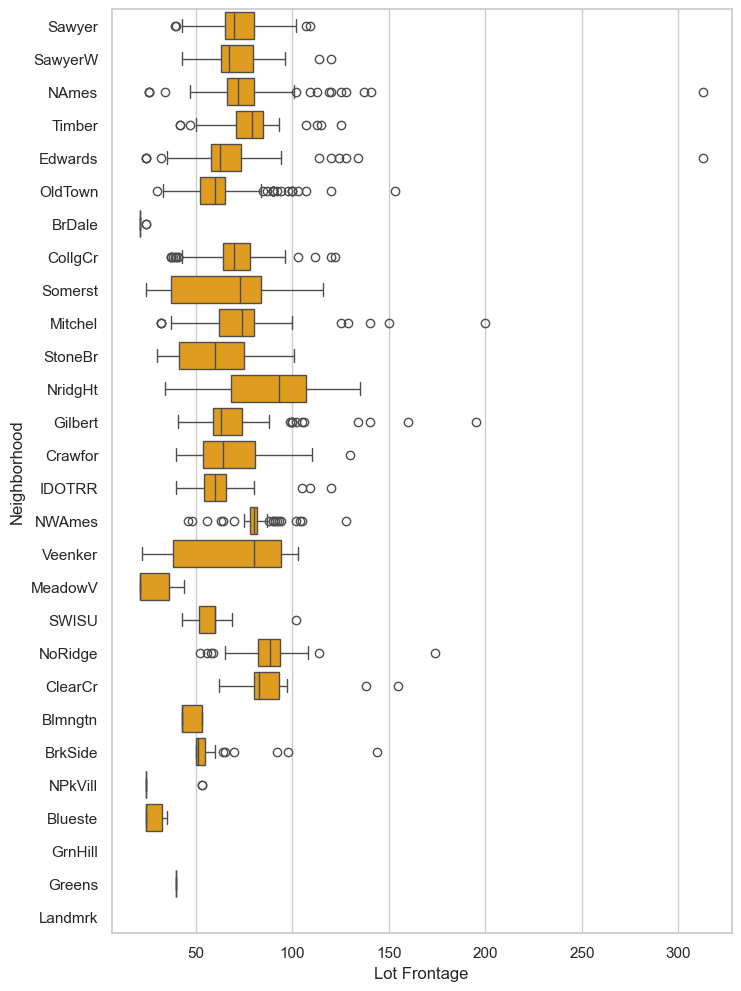

In [411]:
plt.figure(figsize=(8, 12))
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=train_df, orient='h',color='orange');
# plt.savefig('../Presentation/box-plot lot frontage by neighborhood.png')  # Change the filename as needed

In [412]:
train_df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    55.739130
ClearCr    92.500000
CollgCr    70.753247
Crawfor    69.272727
Edwards    66.492188
Gilbert    72.025641
Greens     40.000000
GrnHill          NaN
IDOTRR     62.079365
Landmrk          NaN
MeadowV    26.809524
Mitchel    75.476923
NAmes      75.192453
NPkVill    27.625000
NWAmes     80.965517
NoRidge    88.305556
NridgHt    86.294118
OldTown    62.802548
SWISU      58.387097
Sawyer     72.774648
SawyerW    70.493333
Somerst    63.982906
StoneBr    60.058824
Timber     78.594595
Veenker    67.846154
Name: Lot Frontage, dtype: float64

In [413]:
train_df.loc[:,'Lot Frontage'] = train_df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [414]:
train_df[train_df['Lot Frontage'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
463,2257,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2007,WD,330000
1121,2789,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,...,48,0,0,0,0,0,6,2006,WD,137000
1211,2893,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,11,2006,WD,230000


In [415]:
train_df['Lot Frontage'] = train_df['Lot Frontage'].fillna(0)

/var/folders/4g/t9m4gw7n7dx1x3j6srwz6zqm0000gn/T/ipykernel_32711/3781524374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Lot Frontage'] = train_df['Lot Frontage'].fillna(0)


### Outliners

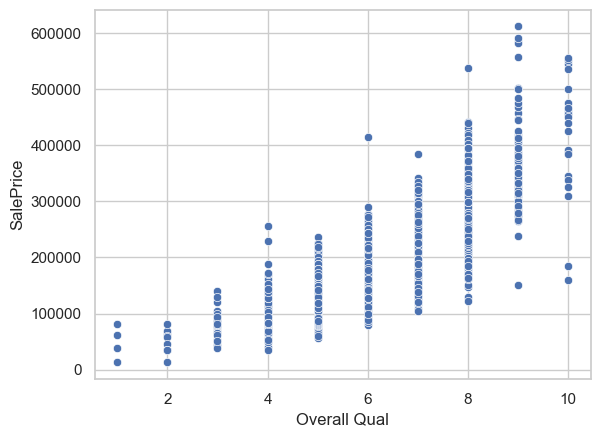

In [416]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=train_df)
plt.savefig('../Presentation/Outliners for overall quality.png')  # Change the filename as needed;

In [417]:
train_df[(train_df['Overall Qual']>8) & (train_df['SalePrice']<200000)]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
125,1183,60,RL,67.846154,24572,Pave,IR1,Lvl,AllPub,CulDSac,...,70,16,0,0,0,0,6,2008,WD,150000
960,1499,60,RL,313.000000,63887,Pave,IR3,Bnk,AllPub,Corner,...,292,0,0,0,480,0,1,2008,New,160000
1885,2181,20,RL,128.000000,39290,Pave,IR1,Bnk,AllPub,Inside,...,484,0,0,0,0,17000,10,2007,New,183850


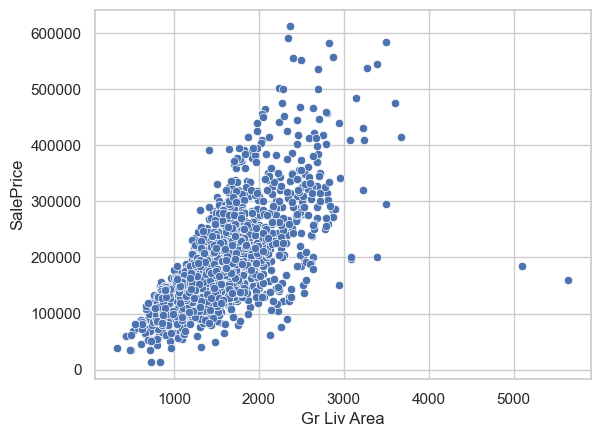

In [418]:
sns.scatterplot(data=train_df, x='Gr Liv Area',y='SalePrice')
plt.savefig('../Presentation/Outliner for above grade living area.png')  # Change the filename as needed;

In [419]:
train_df[(train_df['Gr Liv Area']>4000) & (train_df['SalePrice']<400000)]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,292,0,0,0,480,0,1,2008,New,160000
1885,2181,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,484,0,0,0,0,17000,10,2007,New,183850


In [420]:
train_df = train_df.drop(index=[960,1885],axis=0)

In [421]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 0 to 2050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2046 non-null   int64  
 1   MS SubClass      2046 non-null   int64  
 2   MS Zoning        2046 non-null   object 
 3   Lot Frontage     2046 non-null   float64
 4   Lot Area         2046 non-null   int64  
 5   Street           2046 non-null   object 
 6   Lot Shape        2046 non-null   object 
 7   Land Contour     2046 non-null   object 
 8   Utilities        2046 non-null   object 
 9   Lot Config       2046 non-null   object 
 10  Land Slope       2046 non-null   object 
 11  Neighborhood     2046 non-null   object 
 12  Condition 1      2046 non-null   object 
 13  Condition 2      2046 non-null   object 
 14  Bldg Type        2046 non-null   object 
 15  House Style      2046 non-null   object 
 16  Overall Qual     2046 non-null   int64  
 17  Overall Cond     20

In [422]:
train_df.shape

(2046, 76)

In [423]:
missing_v = missing_columns(train_df)

In [424]:
missing_v

Bsmt Qual        0.025904
Bsmt Cond        0.025904
Bsmt Exposure    0.027370
Garage Type      0.055230
Garage Finish    0.055230
Garage Qual      0.055230
Garage Cond      0.055230
Mas Vnr Type     0.604594
dtype: float64

In [425]:
# Export cleaned training data
train_df.to_csv('../datasets/Cleaned/Cleaned train data.csv',index=False)

## Step 3. Training Time

### OLS

In [426]:
num_corr_var = train_df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice',ascending =False)

In [427]:
num_corr_2 = num_corr_var[(num_corr_var['SalePrice']>0.3) | (num_corr_var['SalePrice']< -0.3)]
num_corr_2

,SalePrice
SalePrice,1.000000
Overall Qual,0.804236
Gr Liv Area,0.720781
Total Bsmt SF,0.667636
Garage Area,0.655214
1st Flr SF,0.651810
Garage Cars,0.648549
Year Built,0.572813
Year Remod/Add,0.550558
Full Bath,0.537626


In [428]:
xvars= [
    'Overall Qual',
    'Gr Liv Area', #SC
    'Total Bsmt SF',
    'Garage Area', #SC
    '1st Flr SF', #SC
    'Year Remod/Add', #poly
    'Full Bath',
    'Garage Yr Blt', #poly
    'Mas Vnr Area', #SC
    'TotRms AbvGrd',
    'Garage Cars',
    'BsmtFin SF 1', #SC
    'Year Built', #poly
    'Fireplaces',
    'Lot Frontage',
    'Open Porch SF',
    'Wood Deck SF',
    'Lot Area'
]
y = train_df[['SalePrice']]
len(xvars)

18

In [429]:
xvars_desc = {
    'Overall Qual':'Overall material and finish quality',
    'Gr Liv Area':'Above grade (ground) living area square feet',
    'Total Bsmt SF':'Total square feet of basement area',
    'Garage Area':'Size of garage in square feet',
    '1st Flr SF':'First Floor square feet',
    'Year Remod/Add':'Remodel date',
    'Full Bath':'Full bathrooms above grade',
    'Garage Yr Blt':'Year garage was built',
    'Mas Vnr Area':'Masonry veneer type',
    'TotRms AbvGrd':'Total rooms above grade',
    'Garage Cars':'Size of garage in car capacity',
    'BsmtFin SF 1':'Type 1 finished square feet',
    'Year Built':'Original construction date',
    'Fireplaces':'Number of fireplaces',
    'Lot Frontage':'Linear feet of street connected to property',
    'Open Porch SF':'Open porch area in square feet',
    'Wood Deck SF':'Wood deck area in square feet',
    'Lot Area':'Lot size in square feet'
    
}


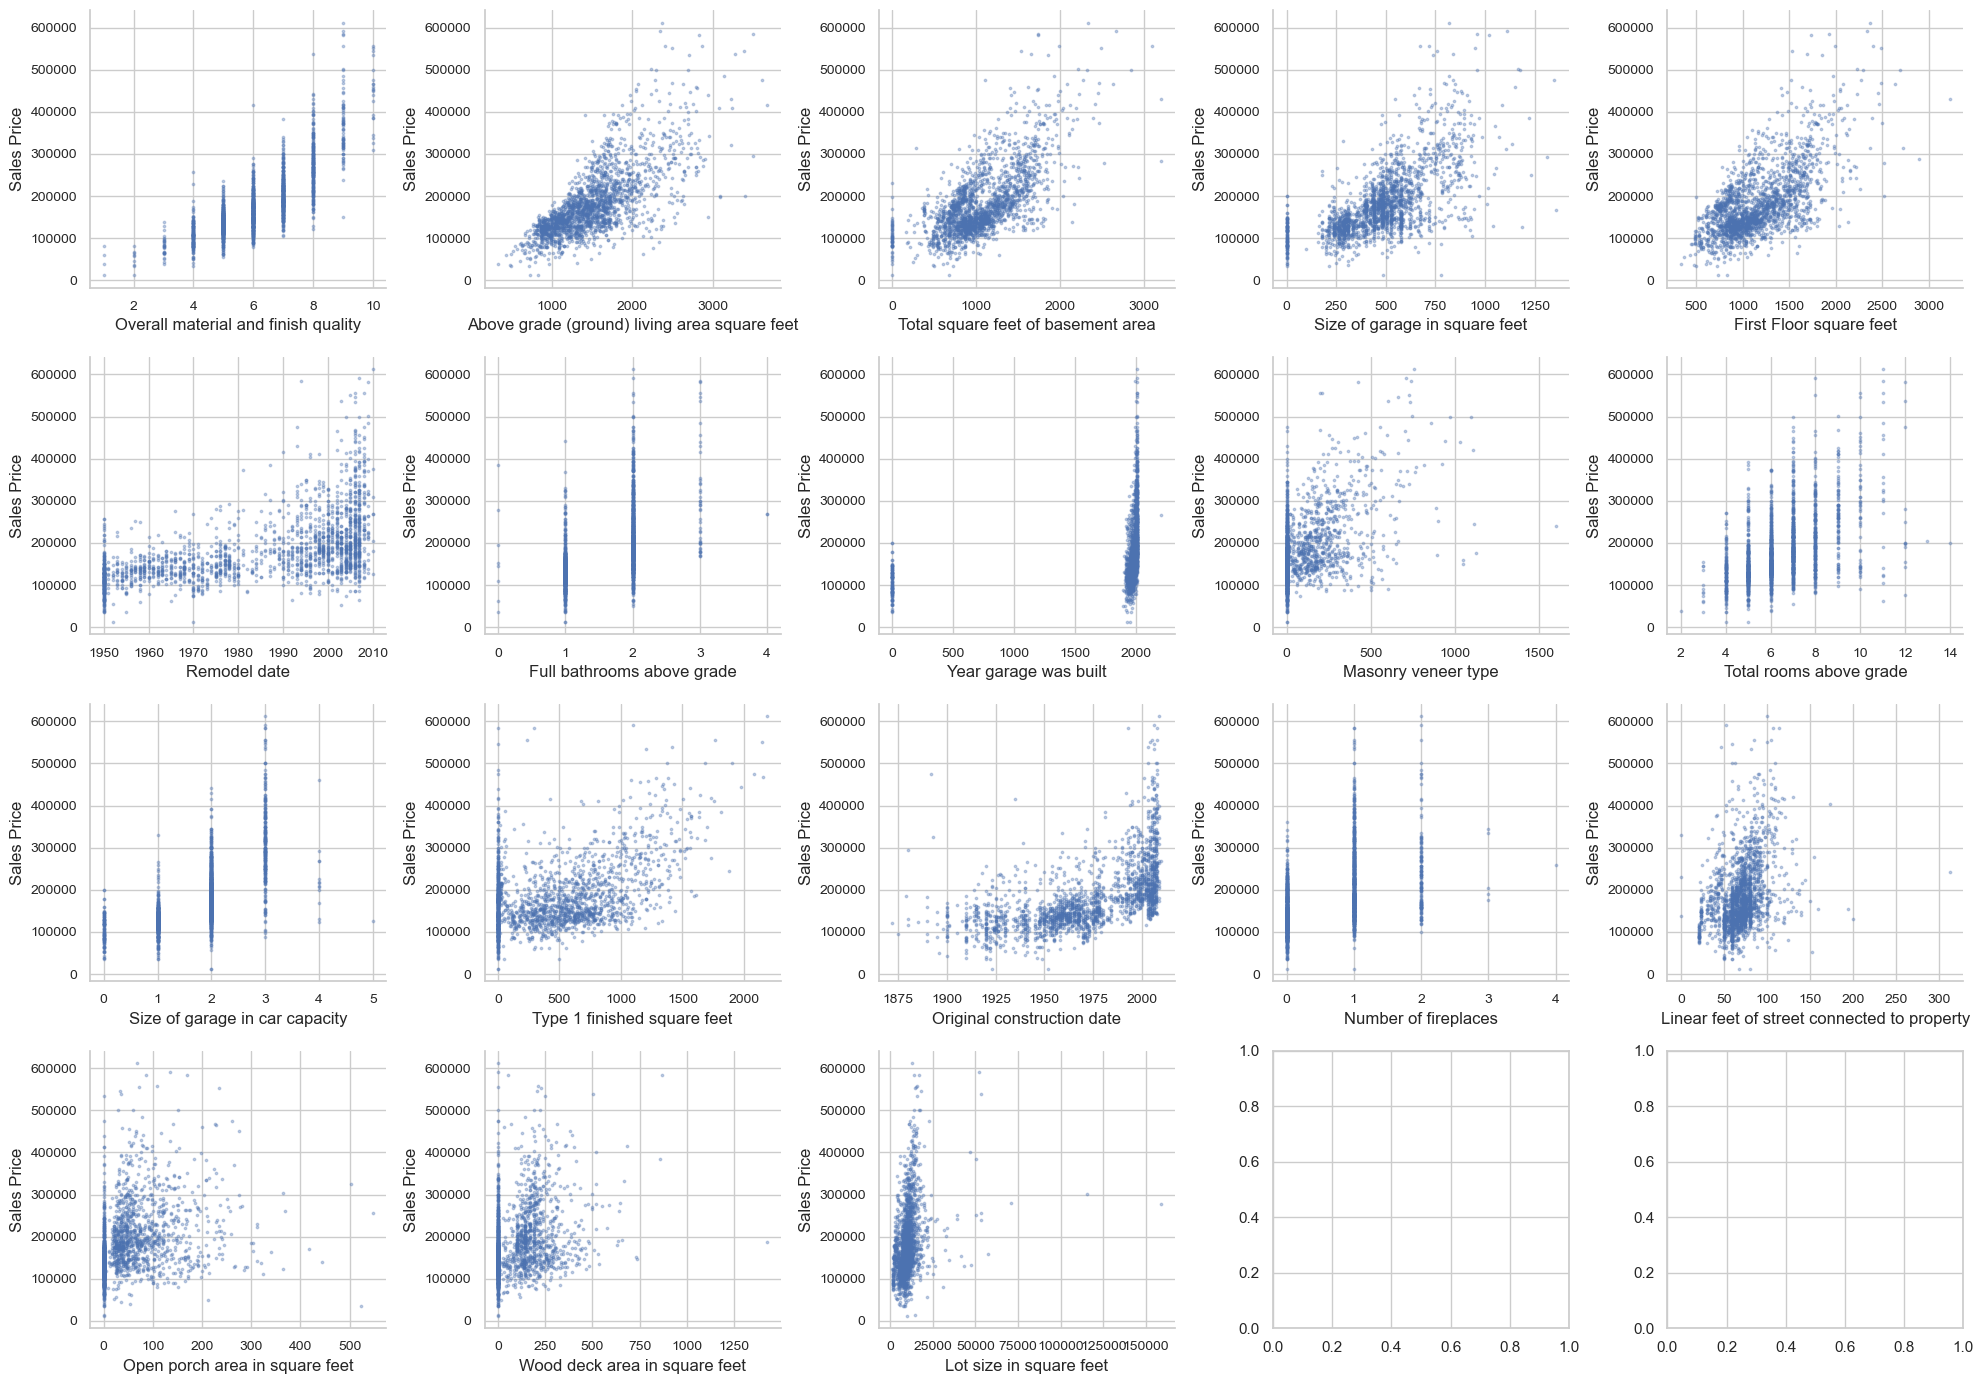

In [430]:
# Create subplots
fig, axs = plt.subplots(4, 5, figsize=(20, 14))

# Plot data
axs = axs.flatten()

for i in range(len(xvars)):
    axs[i].scatter(train_df[xvars[i]], y, alpha = 1/3, s =3)
    axs[i].set_xlabel(f'{xvars_desc[xvars[i]]}', fontsize=12)
    axs[i].set_ylabel('Sales Price', fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=10)  # Adjust tick label font size
    axs[i].spines['top'].set_visible(False)  # Hide top spine
    axs[i].spines['right'].set_visible(False)  # Hide right spine
    axs[i].margins(x=0.05, y=0.05)  # Decrease white edge
plt.tight_layout() 
plt.savefig('../Presentation/scatter_plots.png')  # Change the filename as needed

### Model training and validation

In [431]:
xvars = [
    'Overall Qual',
    'Gr Liv Area', #SC
    'Total Bsmt SF',
    'Garage Area', #SC
    '1st Flr SF', #SC
    'Garage Cars',
    'Year Built', #poly
    'Year Remod/Add', #poly
    'Full Bath',
    'Garage Yr Blt', #poly
    'Mas Vnr Area', #SC
    'TotRms AbvGrd',
    'Fireplaces',
    'BsmtFin SF 1',#SC
    'Lot Frontage',
    'Open Porch SF',
    'Wood Deck SF',
    'Lot Area',
    'House Style',
    'Neighborhood',
    'MS Zoning',
    'Roof Matl',
    'Kitchen Qual',
    'Foundation'
]

X_full = train_df[xvars]

In [432]:
X_full .info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 0 to 2050
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall Qual    2046 non-null   int64  
 1   Gr Liv Area     2046 non-null   int64  
 2   Total Bsmt SF   2046 non-null   float64
 3   Garage Area     2046 non-null   float64
 4   1st Flr SF      2046 non-null   int64  
 5   Garage Cars     2046 non-null   float64
 6   Year Built      2046 non-null   int64  
 7   Year Remod/Add  2046 non-null   int64  
 8   Full Bath       2046 non-null   int64  
 9   Garage Yr Blt   2046 non-null   float64
 10  Mas Vnr Area    2046 non-null   float64
 11  TotRms AbvGrd   2046 non-null   int64  
 12  Fireplaces      2046 non-null   int64  
 13  BsmtFin SF 1    2046 non-null   float64
 14  Lot Frontage    2046 non-null   float64
 15  Open Porch SF   2046 non-null   int64  
 16  Wood Deck SF    2046 non-null   int64  
 17  Lot Area        2046 non-null   int64 

In [433]:
y = train_df[['SalePrice']]

In [434]:
oh = OneHotEncoder(handle_unknown = 'ignore',drop='first')
X_oh = oh.fit_transform(train_df[xvars_char]).toarray()
train_oh = pd.DataFrame(X_oh, columns=oh.get_feature_names_out())
train_oh.head()

,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Roof Matl_WdShake,Roof Matl_WdShngl,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#### Interactions with selection of X

In [435]:
ct = ColumnTransformer([
    ('poly', PolynomialFeatures(include_bias=False, degree=2), [
        'Garage Cars','Overall Qual','Fireplaces','Full Bath','TotRms AbvGrd'
    ]),
], remainder='passthrough')


In [436]:
# Remove categorical columns to avoid erros
X_ct = ct.fit_transform(X_full.drop([
    'House Style','Neighborhood','MS Zoning','Roof Matl','Kitchen Qual','Foundation']
    ,axis = 1))
train_ct = pd.DataFrame(X_ct, columns=ct.get_feature_names_out())
train_ct.head()

,poly__Garage Cars,poly__Overall Qual,poly__Fireplaces,poly__Full Bath,poly__TotRms AbvGrd,poly__Garage Cars^2,poly__Garage Cars Overall Qual,poly__Garage Cars Fireplaces,poly__Garage Cars Full Bath,poly__Garage Cars TotRms AbvGrd,...,remainder__1st Flr SF,remainder__Year Built,remainder__Year Remod/Add,remainder__Garage Yr Blt,remainder__Mas Vnr Area,remainder__BsmtFin SF 1,remainder__Lot Frontage,remainder__Open Porch SF,remainder__Wood Deck SF,remainder__Lot Area
0,2.0,6.0,0.0,2.0,6.0,4.0,12.0,0.0,4.0,12.0,...,725.0,1976.0,2005.0,1976.0,289.0,533.0,72.774648,44.0,0.0,13517.0
1,2.0,7.0,1.0,2.0,8.0,4.0,14.0,2.0,4.0,16.0,...,913.0,1996.0,1997.0,1997.0,132.0,637.0,43.000000,74.0,0.0,11492.0
2,1.0,5.0,0.0,1.0,5.0,1.0,5.0,0.0,1.0,5.0,...,1057.0,1953.0,2007.0,1953.0,0.0,731.0,68.000000,52.0,0.0,7922.0
3,2.0,5.0,0.0,2.0,7.0,4.0,10.0,0.0,4.0,14.0,...,744.0,2006.0,2007.0,2007.0,0.0,0.0,73.000000,0.0,100.0,9802.0
4,2.0,6.0,0.0,2.0,6.0,4.0,12.0,0.0,4.0,12.0,...,831.0,1900.0,1993.0,1957.0,0.0,0.0,82.000000,59.0,0.0,14235.0


In [437]:
X = np.hstack([X_ct, X_oh])

In [438]:
X_whole_col = pd.concat([train_ct,train_oh], ignore_index=True)
X_whole_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 85 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   poly__Garage Cars                 2046 non-null   float64
 1   poly__Overall Qual                2046 non-null   float64
 2   poly__Fireplaces                  2046 non-null   float64
 3   poly__Full Bath                   2046 non-null   float64
 4   poly__TotRms AbvGrd               2046 non-null   float64
 5   poly__Garage Cars^2               2046 non-null   float64
 6   poly__Garage Cars Overall Qual    2046 non-null   float64
 7   poly__Garage Cars Fireplaces      2046 non-null   float64
 8   poly__Garage Cars Full Bath       2046 non-null   float64
 9   poly__Garage Cars TotRms AbvGrd   2046 non-null   float64
 10  poly__Overall Qual^2              2046 non-null   float64
 11  poly__Overall Qual Fireplaces     2046 non-null   float64
 12  poly__

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=1)

In [440]:
lr = LinearRegression()

In [441]:
lr.fit(X_train,y_train)

LinearRegression()

In [442]:
y_pred = lr.predict(X_test)

Generate a table showing the point estimates, standard errors, t-scores, p-values and 95% CI

In [443]:
ols = sm.OLS(y_train,X_train).fit()

In [444]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1427.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                        0.00
Time:                        14:13:15   Log-Likelihood:                         -17498.
No. Observations:                1534   AIC:                                  3.517e+04
Df Residuals:                    1449   BIC:                                  3.562e+04
Df Model:                          85                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.383e+04   6677.213     -5.066      0.000   -4.69e+04   -2.07e+04
x2         -1.925e+04   3763.134     -5.117      0.000   -2.66e+04   -1.19e+04
x3         -1.505e+04   6226.158     -2.418      0.016   -2.73e+04   -2840.750
x4         -3.321e+04   9556.527     -3.475      0.001    -5.2e+04   -1.45e+04
x5         -1.452e+04   3093.862     -4.694      0.000   -2.06e+04   -8454.542
x6           864.8391   1394.156      0.620      0.535   -1869.941    3599.620
x7          4720.5189    944.881      4.996      0.000    2867.039    6573.999
x8           638.2853   1964.572      0.325      0.745   -3215.425    4491.995
x9           996.2123   2339.599      0.426      0.670   -3593.150    5585.575
x10         -185.9893    723.200     -0.257      0.797   -1604.621    1232.643
x11         -258.4806    402.196     -0.643      0.521   -1047.429     530.468
x12         5622.8273   1064.619      5.282      0.000    3534.467    7711.187
x13         1339.2442   1413.793      0.947      0.344   -1434.056    4112.545
x14         3268.5483    434.706      7.519      0.000    2415.828    4121.269
x15        -1780.0585   1302.267     -1.367      0.172   -4334.588     774.471
x16        -4399.0223   2468.729     -1.782      0.075   -9241.686     443.642
x17         -871.7942    842.304     -1.035      0.301   -2524.060     780.471
x18         5369.8941   2426.445      2.213      0.027     610.173    1.01e+04
x19         1411.7150   1223.790      1.154      0.249    -988.874    3812.304
x20         -515.4456    231.724     -2.224      0.026    -969.997     -60.894
x21           42.1613      4.621      9.123      0.000      33.096      51.227
x22           15.9686      3.339      4.783      0.000       9.420      22.518
x23           33.2004      6.935      4.787      0.000      19.596      46.805
x24            7.6985      5.493      1.402      0.161      -3.076      18.473
x25          -39.4790     35.835     -1.102      0.271    -109.773      30.815
x26          125.7334     35.351      3.557      0.000      56.388     195.078
x27            4.2646      2.953      1.444      0.149      -1.527      10.056
x28           23.6767      4.355      5.437      0.000      15.135      32.219
x29           21.3548      1.685     12.675      0.000      18.050      24.660
x30           59.7918     36.882      1.621      0.105     -12.555     132.139
x31           20.1417     10.131      1.988      0.047       0.269      40.015
x32           15.6345      5.087      3.074      0.002       5.656      25.613
x33            0.8432      0.115      7.306      0.000       0.617       1.070
x34         9041.6777   9156.407      0.987      0.324   -8919.553     2.7e+04
x35        -2149.0527   3356.393     -0.640      0.522   -873

In [496]:
mse = metrics.mean_squared_error(y_test, y_pred,squared=False)
mse

26130.515901928862

In [446]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

26130.515901928862

In [447]:
rsqr_train = lr.score(X_train,y_train)
rsqr_train

0.9300749902972281

In [448]:
rsqr_test = lr.score(X_test,y_test)
rsqr_test

0.8773236119091219

In [449]:
r__2 = metrics.r2_score(y_test,y_pred)
r__2

0.8773236119091219

In [450]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9300749902972281
0.8773236119091219


In [451]:
tests = cross_val_score(lr, X_test, y_test, cv = 5)
np.mean(tests)

0.8088460072880974

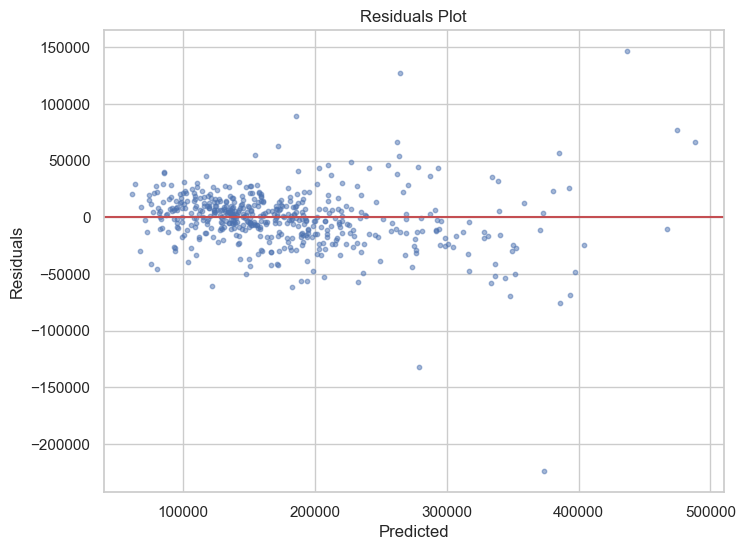

In [452]:
residuals = y_test - y_pred


# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha = 1/2, s = 10)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.savefig('../Presentation/OLS predicted sale price residuals plot.png');

In [453]:
# coefficients = lasso_cv.coef_
# variable_names = X_train.columns
# coef_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})
# coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

### Regularization
#### LASSO

In [454]:
lasso_cv = LassoCV(n_alphas = 100,max_iter=100_000)

In [455]:
sc = StandardScaler()
sc.fit(X_train)

X_train_pr = sc.transform(X_train)
X_test_pr = sc.transform(X_test)

In [456]:
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(n_alphas=100,cv=5, max_iter=100_000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_pr,y_train)

/Users/yilan.c/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5, max_iter=100000)

In [457]:
lasso_cv.alpha_

67.13812255467505

In [458]:
print(lasso_cv.score(X_train_pr,y_train))
print(lasso_cv.score(X_test_pr,y_test))

0.9290904133124065
0.8784501542593125


In [459]:
tests = cross_val_score(lasso_cv, X_test_pr, y_test, cv = 5)
np.mean(tests)

/Users/yilan.c/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yilan.c/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yilan.c/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yilan.c/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWar

0.8309071767878968

In [460]:
y_pred_lasso = lasso_cv.predict(X_test_pr)

In [499]:
rmse = metrics.mean_squared_error(y_test, y_pred_lasso,squared=False)
rmse

26010.26038272316

In [461]:
res_lasso = np.squeeze(y_test) - y_pred_lasso

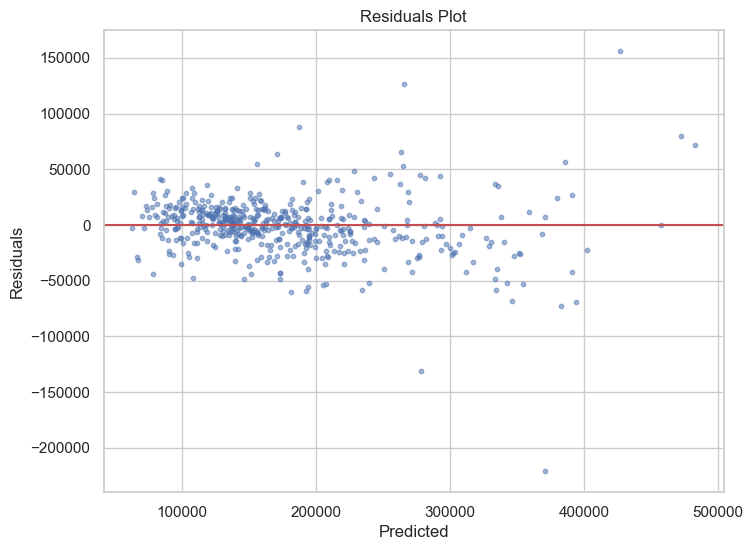

In [462]:
# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lasso, res_lasso, alpha = 1/2, s = 10)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.savefig('../Presentation/LASSO predicted sale price residuals plot.png');

In [463]:
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
rmse_lasso

26010.26038272316

## Step 4. Serving Time

In [464]:
df_test = pd.read_csv('../datasets/test.csv')

In [465]:
df_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [466]:
missing_v=missing_columns(df_test)
missing_v.index

Index(['Electrical', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Cond',
       'Garage Qual', 'Garage Finish', 'Garage Yr Blt', 'Lot Frontage',
       'Fireplace Qu', 'Mas Vnr Type', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [467]:
df_test.loc[:,'Lot Frontage'] = df_test.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
df_test['Lot Frontage'] = df_test['Lot Frontage'].fillna(0)

In [468]:
df_test['Garage Yr Blt'] = df_test['Garage Yr Blt'].fillna(0)

In [469]:
df_test[Bsmtfin_col] = df_test[Bsmtfin_col].fillna(0)

In [470]:
missing_v=missing_columns(df_test)
missing_v.index

Index(['Mas Vnr Area', 'Electrical', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Fireplace Qu', 'Mas Vnr Type', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [471]:
df_test['Mas Vnr Area'] = df_test['Mas Vnr Area'].fillna(0)
df_test['Fireplace Qu'] = df_test['Fireplace Qu'].fillna('NA')
df_test['Mas Vnr Area'] = df_test['Mas Vnr Area'].fillna(0)

In [472]:
# Export cleaned test data
df_test.to_csv('../datasets/Cleaned/Cleaned test data.csv',index=False)

In [473]:
X_test = df_test[xvars]

In [474]:
X_test.columns

Index(['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area',
       '1st Flr SF', 'Garage Cars', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd',
       'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF',
       'Wood Deck SF', 'Lot Area', 'House Style', 'Neighborhood', 'MS Zoning',
       'Roof Matl', 'Kitchen Qual', 'Foundation'],
      dtype='object')

In [475]:
X_test_oh = oh.transform(X_test[['House Style','Neighborhood','MS Zoning','Roof Matl','Kitchen Qual','Foundation']]).toarray()
test = pd.DataFrame(X_test_oh, columns=oh.get_feature_names_out())
test.head(5)

/Users/yilan.c/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Roof Matl_WdShake,Roof Matl_WdShngl,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [476]:
X_test_ct = ct.transform(X_test.drop([
    'House Style','Neighborhood','MS Zoning','Roof Matl','Kitchen Qual','Foundation'],
    axis=1))

In [477]:
X_test_full = np.hstack([X_test_ct, X_test_oh])

In [478]:
# missing_neighbor = set(train_df.Neighborhood) - set(df_test.Neighborhood)
# missing_neighbor

In [479]:
df_test[['House Style']].isnull().sum()

House Style    0
dtype: int64

In [480]:
test_neigh=df_test['House Style'].unique()
test_neigh

array(['2Story', '1Story', '1.5Fin', 'SLvl', 'SFoyer', '2.5Fin', '2.5Unf',
       '1.5Unf'], dtype=object)

In [481]:
train_neigh = train_df['House Style'].unique()
train_neigh

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
       '1.5Unf'], dtype=object)

In [482]:
X_test_full.shape

(878, 85)

In [483]:
X.shape

(2046, 85)

#### OLS predicting

In [484]:
preds =lr.predict(X_test_full)

In [485]:
df_test['SalePrice'] = preds

In [486]:
lr_submission = df_test[['Id','SalePrice']].set_index('Id')

In [487]:
from datetime import datetime
datetime.now()

t=datetime.now()
fmt = t.strftime('%Y%m%d-%H%M')


In [488]:
pathout = f'../Submission/lr_sub_OLS{fmt}.csv'

In [489]:
lr_submission.to_csv(pathout)

#### Lasso fit

In [490]:
X_test_pr = sc.transform(X_test_full)

In [491]:
lasso_pred = lasso_cv.predict(X_test_pr)

In [492]:
df_test['SalePrice'] = preds

In [493]:
lr_submission = df_test[['Id','SalePrice']].set_index('Id')

In [494]:
pathout_lasso = f'../Submission/lr_sub_LASSO{fmt}.csv'

In [495]:
lr_submission.to_csv(pathout_lasso)